## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from statistics import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

C:\Users\Admin\AppData\Local\Temp\ipykernel_12352\2573247685.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
#Importing Data
df = pd.read_excel("Data_Train.xlsx")      
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
DATA = pd.read_excel('Data_Train.xlsx')

In [4]:
#checking datatypes
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Year             10683 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

In [10]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
df.Dep_Time.isnull().sum()

0

In [12]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_hour         10683 non-null  object
 14  Dep_minute       10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [14]:
df.drop('Dep_Time',axis=1,inplace=True)

In [15]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20


In [16]:
df['Dep_hour']=df.Dep_hour.astype(int)
df['Dep_minute']=df.Dep_minute.astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int32 
 13  Dep_minute       10683 non-null  int32 
dtypes: int32(2), int64(4), object(8)
memory usage: 1.1+ MB


In [18]:
df['Duration'].isnull().sum()

0

In [19]:
df['Duration_hour'] = df['Duration'].str.split('h').str[0]

In [20]:
df['Duration_minute'] = df['Duration'].str.split(' ').str[1]
df['Duration_minute'] = df['Duration_minute'].str.split('m').str[0]

In [21]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50,4,45


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int32 
 13  Dep_minute       10683 non-null  int32 
 14  Duration_hour    10683 non-null  object
 15  Duration_minute  9651 non-null   object
dtypes: int32(2), int64(4), object(10)
memory usage: 1.2+ MB


In [23]:
#df.Duration_hour = df.Duration_hour.astype(int)

In [24]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,5m,2 stops,No info,17327,3,6,2019,16,50,5m,NaN


In [25]:
df.drop(6474,axis=0,inplace=True)

In [26]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute


In [27]:
df.Duration_minute = df.Duration_minute.fillna(0)

In [28]:
df.Duration_hour = df.Duration_hour.astype(int)
df.Duration_minute = df.Duration_minute.astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10681 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Day              10682 non-null  int64 
 10  Month            10682 non-null  int64 
 11  Year             10682 non-null  int64 
 12  Dep_hour         10682 non-null  int32 
 13  Dep_minute       10682 non-null  int32 
 14  Duration_hour    10682 non-null  int32 
 15  Duration_minute  10682 non-null  int32 
dtypes: int32(4), int64(4), object(8)
memory usage: 1.2+ MB


In [30]:
df.drop('Duration',axis = 1, inplace=True)

In [31]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [32]:
df[df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
9039,Air India,Delhi,Cochin,NaN,09:25 07 May,NaN,No info,7480,5,6,2019,9,45,23,40


In [33]:
df.drop(9039,axis=0,inplace=True)

In [34]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
df['Total_Stops'] = df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [36]:
df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
df[df.Additional_Info=='Red-eye flight']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
8122,Air Asia,Banglore,New Delhi,BLR → DEL,02:10 02 Mar,0,Red-eye flight,10873,3,1,2019,23,25,2,45


In [38]:
df[df.Additional_Info=='Business class']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,1,Business class,79512,3,1,2019,5,45,5,40
3032,Jet Airways,Banglore,New Delhi,BLR → BDQ → DEL,12:20,1,Business class,28097,3,1,2019,5,50,6,30
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,1,Business class,62427,3,1,2019,5,45,6,40
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,1,Business class,57209,3,1,2019,9,45,4,40


In [39]:
df.drop([2924,3032,5372,10364],axis=0,inplace=True)

In [40]:
df.drop(8122,axis=0,inplace=True)

In [41]:
df[df.Additional_Info=='1 Short layover']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
785,Air India,Banglore,New Delhi,BLR → BOM → BHO → DEL,23:25,2,1 Short layover,26743,3,1,2019,8,50,14,35


In [42]:
df.drop(785,axis=0,inplace=True)

In [43]:
df[df.Additional_Info=='2 Long layover']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
10511,Air India,Banglore,New Delhi,BLR → BOM → BHO → DEL,09:25 02 Mar,2,2 Long layover,26480,3,1,2019,6,45,26,40


In [44]:
df.drop(10511,axis=0,inplace=True)

In [45]:
df[df.Additional_Info=='Change airports']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
1712,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,22:10,2,Change airports,13366,3,1,2019,5,50,16,20
2883,Air India,Banglore,New Delhi,BLR → COK → DEL,23:20 02 Mar,1,Change airports,14305,3,1,2019,22,0,25,20
3535,Air India,Banglore,New Delhi,BLR → MAA → DEL,23:55,1,Change airports,26092,3,1,2019,11,50,12,5
8897,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,22:10,2,Change airports,13576,3,1,2019,11,5,11,5
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,11:20 02 Mar,4,Change airports,17686,3,1,2019,5,50,29,30
9479,Air India,Banglore,New Delhi,BLR → CCU → BBI → DEL,16:20,2,Change airports,15119,3,1,2019,5,50,10,30
10149,Air India,Banglore,New Delhi,BLR → VGA → VTZ → DEL,17:45,2,Change airports,17461,3,1,2019,10,30,7,15


In [46]:
df.drop([10149,9479,9182,8897,3535,2883,1712],axis=0,inplace=True)

In [47]:
df[df.Additional_Info=='1 Long layover']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
1043,Air India,Banglore,New Delhi,BLR → CCU → DEL,19:50,1,1 Long layover,14594,3,1,2019,11,5,8,45
2079,Air India,Banglore,New Delhi,BLR → AMD → DEL,20:30,1,1 Long layover,14752,3,1,2019,0,30,20,0
2405,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:40 02 Mar,1,1 Long layover,22270,3,1,2019,14,5,17,35
2481,Air India,Banglore,New Delhi,BLR → AMD → DEL,23:55,1,1 Long layover,12599,3,1,2019,0,30,23,25
2495,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:40 02 Mar,1,1 Long layover,26890,3,1,2019,16,55,14,45
2556,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10:25 02 Mar,1,1 Long layover,25735,3,1,2019,16,55,17,30
3111,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21:20,1,1 Long layover,27992,3,1,2019,11,40,9,40
3700,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:30 02 Mar,1,1 Long layover,31825,3,1,2019,22,50,10,40
3788,Air India,Banglore,New Delhi,BLR → MAA → DEL,13:00 02 Mar,1,1 Long layover,15434,3,1,2019,11,50,25,10
4521,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:00 02 Mar,1,1 Long layover,25735,3,1,2019,16,55,16,5


In [48]:
df.drop([1043,1034,9657,9019,8957,7724,6576,6336,6024,5628,5013,4521,3788,3700,3111,2556,2495,2481,2405,2079],axis=0,inplace=True)

In [49]:
df['Additional_Info'].value_counts()

No info                         8342
In-flight meal not included     1982
No check-in baggage included     320
No Info                            3
Name: Additional_Info, dtype: int64

In [50]:
df.drop('Additional_Info',axis=1,inplace=True)

In [51]:
df.drop(['Route','Arrival_Time'],axis=1,inplace=True)

In [52]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50


### Data cleaning is Complete here

In [53]:
df.drop('Year',axis=1,inplace=True)

In [54]:
df.drop_duplicates(inplace=True)
df.to_csv('raw_clean_data.csv')

# Starting Model Building

In [55]:
data = df.copy()

In [56]:
data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50


In [57]:
data.drop(['Source','Destination'],axis=1,inplace=True)

In [58]:
data.head(1)

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,0,3897,24,3,22,20,2,50


<AxesSubplot:>

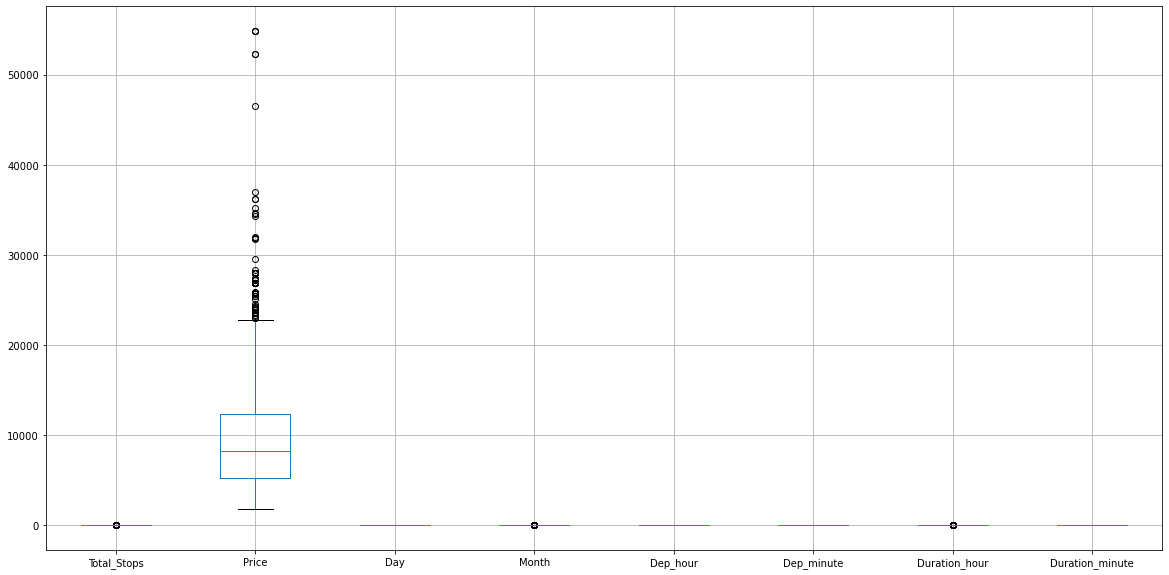

In [59]:
data.boxplot(figsize=(20,10))

In [60]:
data[data.Price>40000]

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
657,Jet Airways Business,1,52229,3,1,5,45,5,0
1478,Jet Airways,1,54826,18,3,18,40,6,5
2618,Jet Airways,1,54826,18,3,22,50,6,15
5439,Jet Airways,1,54826,3,1,16,55,6,5
7351,Jet Airways Business,2,46490,3,3,20,5,8,20
9715,Jet Airways Business,2,52285,3,6,20,5,8,20


In [61]:
#Outlier using IQR test
def outliers_IQR_test(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in data:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

outliers_list = outliers_IQR_test(data.Price)
len(outliers_list)

79

In [62]:
outliers_list

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 54826,
 26890,
 35185,
 26890,
 25735,
 25913,
 22950,
 27992,
 23267,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 23001,
 25703,
 23528,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 26890,
 31825]

In [63]:
data['Airline'].value_counts()

Jet Airways                          3687
IndiGo                               2043
Air India                            1678
Multiple carriers                    1196
SpiceJet                              813
Vistara                               477
Air Asia                              317
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Jet Airways Business                    3
Trujet                                  1
Name: Airline, dtype: int64

In [64]:
data[data.Airline=='Trujet']

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
2878,Trujet,1,4140,3,6,13,5,3,15


In [65]:
data.drop(2878,axis=0,inplace=True)

In [66]:
data[data.Airline=='Jet Airways Business']

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
657,Jet Airways Business,1,52229,3,1,5,45,5,0
7351,Jet Airways Business,2,46490,3,3,20,5,8,20
9715,Jet Airways Business,2,52285,3,6,20,5,8,20


In [67]:
data.drop([657,7351,9715],axis=0,inplace=True)

In [68]:
data[data.Airline=='Vistara Premium economy']

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
426,Vistara Premium economy,0,11793,3,3,16,0,2,35
7657,Vistara Premium economy,0,9125,3,1,7,5,2,15
8615,Vistara Premium economy,0,5969,4,6,11,30,2,50


In [69]:
data.drop([426,7657,8615],axis=0,inplace=True)

In [70]:
data[data.Airline=='Multiple carriers Premium economy']

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
717,Multiple carriers Premium economy,1,10161,21,3,7,30,11,45
1799,Multiple carriers Premium economy,1,9845,21,3,7,30,13,30
4627,Multiple carriers Premium economy,1,10161,21,3,8,55,10,20
4718,Multiple carriers Premium economy,1,9845,21,3,6,0,15,0
5090,Multiple carriers Premium economy,1,11269,21,3,6,0,7,20
5489,Multiple carriers Premium economy,1,11269,21,3,6,0,9,30
5673,Multiple carriers Premium economy,1,14629,21,3,6,0,12,50
5836,Multiple carriers Premium economy,1,14629,21,3,7,30,11,20
6470,Multiple carriers Premium economy,1,9845,21,3,8,55,12,5
6591,Multiple carriers Premium economy,1,11269,21,3,8,55,6,35


In [71]:
data.drop([717,1799,4627,4718,5090,5489,5673,5836,6470,6591,6601,9249,9253],axis=0,inplace=True)

In [72]:
data['Airline'].value_counts()

Jet Airways          3687
IndiGo               2043
Air India            1678
Multiple carriers    1196
SpiceJet              813
Vistara               477
Air Asia              317
GoAir                 194
Name: Airline, dtype: int64

<AxesSubplot:>

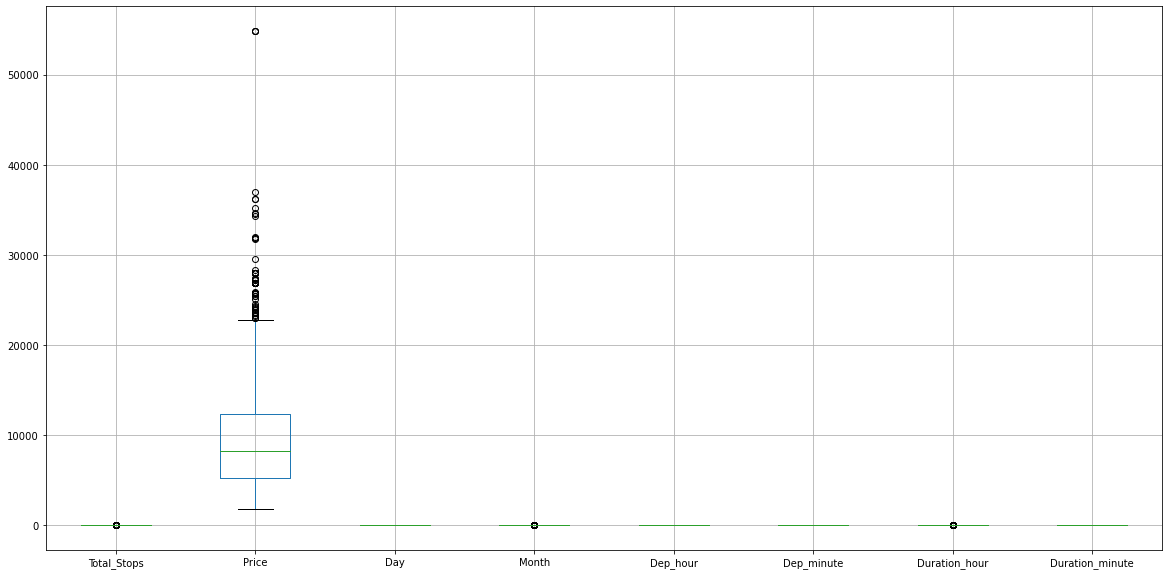

In [73]:
data.boxplot(figsize=(20,10))

In [74]:
data[data.Price>40000]

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
1478,Jet Airways,1,54826,18,3,18,40,6,5
2618,Jet Airways,1,54826,18,3,22,50,6,15
5439,Jet Airways,1,54826,3,1,16,55,6,5


In [75]:
data.drop([1478,2618,5439],axis=0,inplace=True)

In [76]:
#ProfileReport(data)

In [77]:
data[data.duplicated()]

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute


In [78]:
data.drop_duplicates(inplace=True)

In [79]:
data

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,0,3897,24,3,22,20,2,50
1,Air India,2,7662,5,1,5,50,7,25
2,Jet Airways,2,13882,6,9,9,25,19,0
3,IndiGo,1,6218,5,12,18,5,5,25
4,IndiGo,1,13302,3,1,16,50,4,45
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,0,4107,4,9,19,55,2,30
10679,Air India,0,4145,27,4,20,45,2,35
10680,Jet Airways,0,7229,27,4,8,20,3,0
10681,Vistara,0,12648,3,1,11,30,2,40


In [80]:
data[data.Duration_hour<2]   #No anomalies found

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
67,Air India,0,3625,5,6,13,55,1,30
70,Jet Airways,0,5678,6,1,7,5,1,25
77,IndiGo,0,4049,4,3,6,25,1,30
98,Jet Airways,0,8040,18,6,7,5,1,25
121,Air India,0,3100,5,3,15,0,1,25
...,...,...,...,...,...,...,...,...,...
10611,Jet Airways,0,4050,18,5,7,5,1,25
10617,IndiGo,0,2754,27,5,2,35,1,30
10655,Jet Airways,0,5678,5,3,2,55,1,25
10671,Air India,0,3100,6,6,21,5,1,20


In [81]:
airline=data[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [82]:
data['Air_India']= airline['Airline_Air India']

In [83]:
data['GoAir']= airline['Airline_GoAir']

In [84]:
data['Indigo']= airline['Airline_IndiGo']
data['Jet_airways']= airline['Airline_Jet Airways']
data['Multiple_carriers']= airline['Airline_Multiple carriers']
data['SpiceJet']= airline['Airline_SpiceJet']
data['Vistara']= airline['Airline_Vistara']

In [85]:
data

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Air_India,GoAir,Indigo,Jet_airways,Multiple_carriers,SpiceJet,Vistara
0,IndiGo,0,3897,24,3,22,20,2,50,0,0,1,0,0,0,0
1,Air India,2,7662,5,1,5,50,7,25,1,0,0,0,0,0,0
2,Jet Airways,2,13882,6,9,9,25,19,0,0,0,0,1,0,0,0
3,IndiGo,1,6218,5,12,18,5,5,25,0,0,1,0,0,0,0
4,IndiGo,1,13302,3,1,16,50,4,45,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,0,4107,4,9,19,55,2,30,0,0,0,0,0,0,0
10679,Air India,0,4145,27,4,20,45,2,35,1,0,0,0,0,0,0
10680,Jet Airways,0,7229,27,4,8,20,3,0,0,0,0,1,0,0,0
10681,Vistara,0,12648,3,1,11,30,2,40,0,0,0,0,0,0,1


In [87]:
data_LR = data.drop('Airline',axis=1)

In [88]:
data_LR.head(1)

,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Air_India,GoAir,Indigo,Jet_airways,Multiple_carriers,SpiceJet,Vistara
0,0,3897,24,3,22,20,2,50,0,0,1,0,0,0,0


In [89]:
x = data_LR.drop('Price',axis=1)
y = data_LR.Price

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
lr.score(x_train,y_train)

0.5754831228637662

In [94]:
lr.score(x_test,y_test)

0.589793273275732

In [95]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [96]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [97]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2832.4024
- Mean Absolute Error: 2015.0359
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2759.9726
- Mean Absolute Error: 1983.0208
- R2 Score: 0.5898


Lasso
Model performance for Training set
- Root Mean Squared Error: 2832.5097
- Mean Absolute Error: 2014.2805
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2760.4219
- Mean Absolute Error: 1983.1097
- R2 Score: 0.5897


Ridge
Model performance for Training set
- Root Mean Squared Error: 2832.4142
- Mean Absolute Error: 2014.7835
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2760.0638
- Mean Absolute Error: 1983.0444
- R2 Score: 0.5898


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2252.7424
- Mean Absolute Error: 1518.4338


In [98]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [99]:
rf_model.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [100]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8184992863232285

In [101]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.9217134032523783

In [102]:
rf_final=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth=15)

In [103]:
rf_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200)

In [104]:
#predicting the values
pred=rf_final.predict(x_test)
r2_score(y_test,pred)

0.8169218291199337

In [105]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.9217134032523783

In [106]:
RandomForestRegressor()

RandomForestRegressor()

In [107]:
# Gridsearch is taking too long to complete
"""from sklearn.model_selection import GridSearchCV
grid_search = {'n_estimators' : [120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20,25],
                 'min_samples_split' : [2, 5, 10, 15,50,100],
                 'min_samples_leaf' : [1, 2, 5, 10]
                 
                }
rf_regressor=RandomForestRegressor()
rf_model=GridSearchCV(estimator=rf_regressor,param_grid=grid_search,
                            cv=8,n_jobs=-1,verbose=2)
rf_model.fit(x_train,y_train)"""

"from sklearn.model_selection import GridSearchCV\ngrid_search = {'n_estimators' : [120, 150, 180, 200,220,250],\n                 'max_features':['auto','sqrt'],\n                 'max_depth':[5,10,15,20,25],\n                 'min_samples_split' : [2, 5, 10, 15,50,100],\n                 'min_samples_leaf' : [1, 2, 5, 10]\n                 \n                }\nrf_regressor=RandomForestRegressor()\nrf_model=GridSearchCV(estimator=rf_regressor,param_grid=grid_search,\n                            cv=8,n_jobs=-1,verbose=2)\nrf_model.fit(x_train,y_train)"

In [108]:
# Trying xgboost
import optuna
import xgboost as xgb
xgb.XGBRegressor()
def objective(trail, data=x, target=y):
    param = {
        'tree_method':'gpu_hist',
        'lambda':trail.suggest_loguniform('lamba',1e-4,10),
        'alpha': trail.suggest_loguniform('alpha',1e-4,10),
        'colsample_bytree': trail.suggest_categorical('colsample_bytree',[.3,.4,.5,.6,.7,.9,1,3,5]),
        'subsample':trail.suggest_categorical('subsample',[.3,.4,.5,.6,.7,.9,1,3,5]),
        'learning_rate': trail.suggest_categorical('learning_rate',[.00001,.0003,.008,.02,.01,1,2,3,5,6,8,11,15]),
        'n_estimator' : 3000,
        'max_depth': trail.suggest_categorical('max_depth', [2,3,5,7,9,10,11]),
        'random_state': trail.suggest_categorical('random_state',[1,10,20,30,2000,243123]),
        'min_child_weight': trail.suggest_int('min_child_weight',1,200),
        'verbosity':3
    }
    xgb_reg_model = xgb.XGBRegressor(**param)
    xgb_reg_model.fit(x_train,y_train,eval_set = [(x_test,y_test)],verbose=True)
    pred_xgb = xgb_reg_model.predict(x_test)
    rmse = mean_squared_error(y_test,pred_xgb)
    return rmse

In [109]:
find_param = optuna.create_study(direction='minimize')
find_param.optimize(objective,n_trials=10)
find_param.best_trial.params

[I 2023-04-16 07:19:23,332] A new study created in memory with name: no-name-0b45c9f7-0c79-41a7-ba04-830935503c81
C:\Users\Admin\AppData\Local\Temp\ipykernel_12352\1795488588.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_12352\1795488588.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
[W 2023-04-16 07:19:23,359] Trial 0 failed with parameters: {'lamba': 0.25210434093321665, 'alpha': 0.1169908493570525, 'colsample_bytree': 5, 'subsample': 0.4, 'learning_rate': 2, 'max_depth': 3, 'random_sta

[07:19:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:23] ======== Monitor:  ========
[07:19:23] ======== Monitor: HistCutMatrix ========
[07:19:23] ======== Monitor: HistCutMatrix ========


XGBoostError: value 5 for Parameter colsample_bytree exceed bound [0,1]

In [110]:
best_param = {'lamba': 0.0010727035940655387,
 'alpha': 5.482047248887204,
 'colsample_bytree': 0.4,
 'subsample': 0.9,
 'learning_rate': 1,
 'max_depth': 5,
 'random_state': 30,
 'min_child_weight': 62}

xgb_final_model = xgb.XGBRegressor(**best_param)
xgb_final_model.fit(x_train,y_train)

xgb_final_model.score(x_test,y_test)

[07:20:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7870915407723678

In [111]:
xgb_final_model.score(x_train,y_train)

0.8527558173784484

In [ ]:
pwd

# Rough Work

In [112]:
data.shape

(10402, 16)

In [113]:
data.head(1)

,Airline,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Air_India,GoAir,Indigo,Jet_airways,Multiple_carriers,SpiceJet,Vistara
0,IndiGo,0,3897,24,3,22,20,2,50,0,0,1,0,0,0,0


In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50


In [118]:
df.Destination.nunique()

6

In [119]:
df.Airline.value_counts()

Jet Airways                          3687
IndiGo                               2043
Air India                            1678
Multiple carriers                    1196
SpiceJet                              813
Vistara                               477
Air Asia                              317
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Jet Airways Business                    3
Trujet                                  1
Name: Airline, dtype: int64

In [120]:
df.to_csv('raw_clean_data.csv')

## Column Transformer

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [122]:
df01= df.copy()

In [123]:
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),['Airline','Source','Destination']),
    ('std_scl',StandardScaler(),df01.columns)
],remainder='passthrough')

In [124]:
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),['Airline','Source','Destination']),
    #('std_scl',StandardScaler(),df01.columns)
],remainder='passthrough')

In [125]:
df02 = pd.DataFrame(ct.fit_transform(df01))

In [127]:
df02

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3897.0,24.0,3.0,22.0,20.0,2.0,50.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,7662.0,5.0,1.0,5.0,50.0,7.0,25.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,13882.0,6.0,9.0,9.0,25.0,19.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6218.0,5.0,12.0,18.0,5.0,5.0,25.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,13302.0,3.0,1.0,16.0,50.0,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4107.0,4.0,9.0,19.0,55.0,2.0,30.0
10421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4145.0,27.0,4.0,20.0,45.0,2.0,35.0
10422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7229.0,27.0,4.0,8.0,20.0,3.0,0.0
10423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,12648.0,3.0,1.0,11.0,30.0,2.0,40.0


## Applying PCA and standard scaling

In [128]:
df01 

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,9,19,55,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,3,1,11,30,2,40


In [129]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA

In [130]:
x= df01.drop('Price',axis=1)
x

,Airline,Source,Destination,Total_Stops,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,3,1,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4,9,19,55,2,30
10679,Air India,Kolkata,Banglore,0,27,4,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,27,4,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,3,1,11,30,2,40


In [131]:
y =df01.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10425, dtype: int64

In [132]:
x = pd.DataFrame(ct.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,24.0,3.0,22.0,20.0,2.0,50.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.0,1.0,5.0,50.0,7.0,25.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,9.0,9.0,25.0,19.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,12.0,18.0,5.0,5.0,25.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3.0,1.0,16.0,50.0,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,9.0,19.0,55.0,2.0,30.0
10421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,4.0,20.0,45.0,2.0,35.0
10422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,4.0,8.0,20.0,3.0,0.0
10423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,3.0,1.0,11.0,30.0,2.0,40.0


In [133]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=30)
x_train1

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
8591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,18.0,5.0,17.0,0.0,25.0,50.0
9974,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15.0,3.0,23.0,30.0,2.0,50.0
3021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,21.0,3.0,8.0,15.0,10.0,15.0
2078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,21.0,3.0,8.0,55.0,22.0,45.0
1754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,5.0,15.0,15.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,3.0,5.0,5.0,11.0,5.0
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,12.0,19.0,55.0,2.0,30.0
500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,9.0,7.0,10.0,2.0,55.0
4517,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,6.0,17.0,0.0,16.0,45.0


In [134]:
x_test1

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
7064,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,12.0,20.0,25.0,21.0,35.0
4699,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,1.0,17.0,0.0,16.0,45.0
4364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,3.0,22.0,50.0,2.0,30.0
3451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,6.0,8.0,20.0,3.0,0.0
8754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3.0,12.0,18.0,55.0,23.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,6.0,16.0,55.0,3.0,0.0
8301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,4.0,2.0,0.0,5.0,45.0
7815,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,9.0,6.0,30.0,13.0,20.0
7540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,27.0,4.0,9.0,45.0,2.0,50.0


In [135]:
df01.describe()

,Total_Stops,Price,Day,Month,Dep_hour,Dep_minute,Duration_hour,Duration_minute
count,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000
mean,0.800959,8975.947338,12.658225,5.549065,12.479520,24.359233,10.017074,28.213429
std,0.660094,4462.022222,8.787873,2.989832,5.724219,18.801942,8.380125,16.881546
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5224.000000,5.000000,3.000000,8.000000,5.000000,2.000000,15.000000
50%,1.000000,8246.000000,6.000000,5.000000,11.000000,25.000000,8.000000,30.000000
75%,1.000000,12284.000000,21.000000,6.000000,18.000000,40.000000,15.000000,45.000000
max,3.000000,54826.000000,27.000000,12.000000,23.000000,55.000000,47.000000,55.000000


In [136]:
std_sc = StandardScaler()
x_train1 = std_sc.fit_transform(x_train1)
x_test1 = std_sc.fit_transform(x_test1)
x_train1

array([[-0.43985739, -0.13851396, -0.49831328, ..., -1.29834491,
         1.79903149,  1.28329705],
       [-0.43985739, -0.13851396,  2.00676974, ...,  0.29587341,
        -0.95053802,  1.28329705],
       [ 2.27346411, -0.13851396, -0.49831328, ..., -0.50123575,
         0.00583398, -0.7812096 ],
       ...,
       [-0.43985739, -0.13851396,  2.00676974, ..., -0.7669388 ,
        -0.95053802,  1.57822658],
       [-0.43985739, -0.13851396, -0.49831328, ..., -1.29834491,
         0.72311299,  0.98836753],
       [-0.43985739, -0.13851396,  2.00676974, ...,  0.29587341,
        -0.95053802,  1.57822658]])

## PCA 

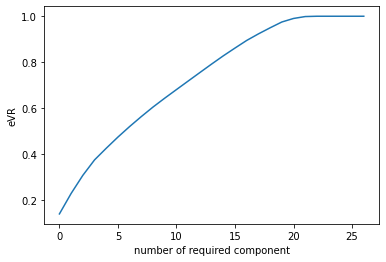

In [137]:
pca = PCA()
pca.fit_transform(x_train1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")
plt.show()

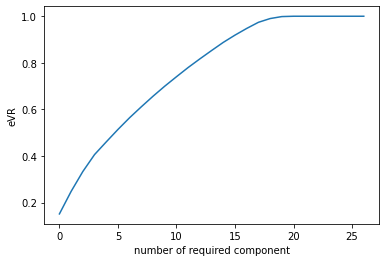

In [138]:
pca = PCA()
pca.fit_transform(x_test1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")
plt.show()

In [139]:
x_train1.shape

(8340, 27)

In [140]:
pca1 = PCA(n_components=23)
x_train1 = pca1.fit_transform(x_train1)
x_test1 = pca1.fit_transform(x_test1)
x_train1

array([[-3.51157183e-01, -2.04791160e+00, -1.26844958e+00, ...,
         8.15399098e-01, -4.31134520e-01,  2.09995806e-03],
       [-2.10123059e+00, -1.08541456e-01, -3.20221904e-01, ...,
         1.02821304e-01, -2.88048140e-01, -6.00642993e-02],
       [-7.79418931e-02, -7.59147770e-01, -1.50960490e-01, ...,
        -3.06250330e-01,  1.54803980e-01,  5.62832748e-03],
       ...,
       [-2.33322053e+00,  5.78269466e-01, -4.81844170e-02, ...,
         7.87696292e-01,  3.59799984e-02, -3.21423935e-02],
       [-1.26553150e-01, -2.43449608e+00, -7.73206609e-01, ...,
        -1.78020138e-02, -2.28416222e-02, -1.71820651e-02],
       [-2.37155799e+00,  8.19907558e-01,  5.63592086e-02, ...,
         5.99301829e-01, -4.28427487e-02, -6.62935683e-02]])

In [141]:
x_train1 = pd.DataFrame(x_train1,columns=['pc1','pc2','pc3','pc4','pc5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
x_test1 = pd.DataFrame(x_test1,columns=['pc1','pc2','pc3','pc4','pc5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

x_test1

,pc1,pc2,pc3,pc4,pc5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,-0.072007,-2.876051,0.591246,0.201874,-0.495203,0.677901,2.056076,-0.279110,0.653740,0.327444,...,-0.004555,-0.452896,0.288339,-0.247399,-0.922826,-0.513029,-0.493144,-0.062617,-3.883619e-15,-2.735448e-15
1,-0.304245,-2.353682,0.382096,-0.155262,-1.369035,-0.293875,0.107110,-0.280962,-0.360482,-0.438180,...,-0.267803,0.615083,2.026832,-0.541694,1.001770,-0.025176,-0.000895,0.001358,-3.290924e-15,4.192036e-16
2,-1.702143,-0.942594,0.350901,-0.603884,-0.933622,-0.897587,-0.506329,-1.275481,0.585333,0.224083,...,0.465194,-1.586657,-0.182995,-0.934599,0.175246,1.091745,-0.332999,0.934513,-4.460877e-15,1.386381e-14
3,-1.528813,-0.372486,-0.027384,-1.372656,-0.649443,1.303790,0.442364,1.523955,-0.165777,0.135235,...,-0.186716,1.483928,-2.039466,-0.733057,1.070232,0.133257,0.053150,-0.007984,5.931864e-15,1.170732e-15
4,0.019304,-2.508496,0.557770,0.340192,1.411038,3.299363,0.010394,0.311519,-0.503433,-0.633713,...,0.091200,-1.897364,-0.508593,0.015344,-1.342393,-0.977797,-0.643594,-0.065798,-1.656333e-15,8.813041e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-2.234559,0.730560,-0.087601,-1.859523,0.127548,-0.108364,0.136155,-0.595371,-0.939776,1.153480,...,0.145304,-0.663243,-3.131452,-0.585211,0.622067,-0.964761,0.048906,-0.084687,2.499042e-16,-9.536438e-18
2081,0.860331,2.077871,-0.604920,-0.989544,0.324094,-0.848384,-0.199872,-1.281670,-1.506686,-0.164520,...,-0.001836,1.684356,0.556845,1.440590,-0.526271,0.109762,0.290009,0.042196,3.978812e-16,-7.290315e-18
2082,-0.166571,-2.096041,0.565454,0.334348,-0.241484,0.871672,1.041698,-0.296943,0.589892,-0.179244,...,1.173561,1.199364,-0.527130,0.018003,-0.015195,0.318440,0.060353,-0.046671,3.151315e-16,2.771059e-17
2083,-2.503324,0.663652,0.133897,-2.803505,-0.217559,-1.032856,-1.238545,3.014080,-0.224378,0.522638,...,0.081612,-0.481601,-1.243838,0.132761,-0.076417,0.160525,0.294518,-0.114181,3.299729e-16,1.029315e-17


In [142]:
er = ElasticNet()
er.fit(x_train1,y_train1)
er.score(x_train1,y_train1)

0.5684319843318779

In [143]:
er.score(x_test1,y_test1)

0.35494915176796404

In [144]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train1, y_train1) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test1)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train1, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test1, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2804.2730
- Mean Absolute Error: 1936.7133
- R2 Score: 0.6052
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3738.5691
- Mean Absolute Error: 2764.0026
- R2 Score: 0.2953


Lasso
Model performance for Training set
- Root Mean Squared Error: 2804.2824
- Mean Absolute Error: 1936.4510
- R2 Score: 0.6052
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3737.4470
- Mean Absolute Error: 2762.7659
- R2 Score: 0.2957


Ridge
Model performance for Training set
- Root Mean Squared Error: 2804.2733
- Mean Absolute Error: 1936.6707
- R2 Score: 0.6052
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3738.4947
- Mean Absolute Error: 2763.9320
- R2 Score: 0.2953


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1931.3887
- Mean Absolute Error: 1233.5224


In [145]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train1,y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

rf_model.best_params_

In [146]:
#predicting the values
pred=rf_model.predict(x_test1)
r2_score(y_test1,pred)

0.3378227576225128

In [147]:
#predicting the values
pred=rf_model.predict(x_train1)
r2_score(y_train1,pred)

0.8988512159005397

### No use of doing PCA 

## Pipeline with OHE,STD Scaling, Column Transformer

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
steps=[('sc',StandardScaler()),
       ('svm',SVR())
      ]

In [ ]:
pipe = Pipeline(steps)           #   Main Step

In [ ]:
from sklearn import set_config

In [ ]:
set_config(display='diagram')

In [ ]:
pipe

In [ ]:
x_train1

In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
pipe.score(x_train,y_train)

In [ ]:
pipe['sc'].fit_transform(x_train)

In [ ]:
df

In [ ]:
models = {
                "Random Forest": 5,
                "Decision Tree": 1,
}
list(models)